In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV

#farklı makine öğrenmesi modelleriyle deneme eğitimleri yapıp hangi modelin daha iyi sonuç vereceğini öngörüyor
from lazypredict.Supervised import LazyClassifier

#sınıflandırmak için deneme modelleri
from sklearn.svm import LinearSVC,SVC
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#basari siniflandirmasi için metrikleri alalim
from sklearn.metrics import accuracy_score

#dongu halinde modelimizin en iyi hiper parametrelerini bulmak icin kullanıyoruz
from sklearn.model_selection import GridSearchCV


In [56]:
data = pd.read_csv("Telco-Customer-Churn.csv")

In [57]:
veri = data.copy()

In [58]:
#satır sütun bilgisi
veri.shape

(7043, 21)

In [59]:
#kaç satır ve kaç sütun olduğu, tüm sütunların isimlerini, hersütunun veri tipi, her sütunda kaç tane boş değer olduğunu döndürür 
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [60]:
#kullanılmayacağını düsündügümüz sütunu siliyoruz(burda bulunan ıd random atandığı için bizim için bir karşılığı bulunmamaktadır)
veri=veri.drop(columns ="customerID", axis=1)

In [61]:
# Sütun adlarını Türkçeye çevirme
veri = veri.rename({
    "gender": "cinsiyet",
    "SeniorCitizen": "65yasUstu",
    "Partner": "medeniDurum",
    "Dependents": "bakmaSorumlulugu",
    "tenure": "musteriOlmaSuresi",
    "PhoneService": "evTelefonuAboneligi",
    "MultipleLines": "birdenFazlaAbonelik",
    "InternetService": "internetAboneligi",
    "OnlineSecurity": "guvenlikHizmetiAboneligi",
    "OnlineBackup": "yedeklemeHizmetiAboneligi",
    "DeviceProtection": "ekipmanGuvenlikAboneligi",
    "TechSupport": "teknikDestekAboneligi",
    "StreamingTV": "ipTV",
    "StreamingMovies": "filmAboneligi",
    "Contract": "sozlesmeSuresi",
    "PaperlessBilling": "onlineFatura",
    "PaymentMethod": "odemeYontemi",
    "MonthlyCharges": "aylıkUcret",
    "TotalCharges": "toplamUcret",
    "Churn": "musteriKaybı"
},axis =1)

In [62]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cinsiyet                   7043 non-null   object 
 1   65yasUstu                  7043 non-null   int64  
 2   medeniDurum                7043 non-null   object 
 3   bakmaSorumlulugu           7043 non-null   object 
 4   musteriOlmaSuresi          7043 non-null   int64  
 5   evTelefonuAboneligi        7043 non-null   object 
 6   birdenFazlaAbonelik        7043 non-null   object 
 7   internetAboneligi          7043 non-null   object 
 8   guvenlikHizmetiAboneligi   7043 non-null   object 
 9   yedeklemeHizmetiAboneligi  7043 non-null   object 
 10  ekipmanGuvenlikAboneligi   7043 non-null   object 
 11  teknikDestekAboneligi      7043 non-null   object 
 12  ipTV                       7043 non-null   object 
 13  filmAboneligi              7043 non-null   objec

In [63]:
#her sutunun tiplerini ve o sütunda bununan benzersiz degerleri donduruyorum
for i in veri.columns:
    print(i)
    print(veri[i].dtypes)
    print(veri[i].unique())

cinsiyet
object
['Female' 'Male']
65yasUstu
int64
[0 1]
medeniDurum
object
['Yes' 'No']
bakmaSorumlulugu
object
['No' 'Yes']
musteriOlmaSuresi
int64
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
evTelefonuAboneligi
object
['No' 'Yes']
birdenFazlaAbonelik
object
['No phone service' 'No' 'Yes']
internetAboneligi
object
['DSL' 'Fiber optic' 'No']
guvenlikHizmetiAboneligi
object
['No' 'Yes' 'No internet service']
yedeklemeHizmetiAboneligi
object
['Yes' 'No' 'No internet service']
ekipmanGuvenlikAboneligi
object
['No' 'Yes' 'No internet service']
teknikDestekAboneligi
object
['No' 'Yes' 'No internet service']
ipTV
object
['No' 'Yes' 'No internet service']
filmAboneligi
object
['No' 'Yes' 'No internet service']
sozlesmeSuresi
object
['Month-to-month' 'One year' 'Two year']
onlineFatura
object
['Yes' 'No']
odemeYontem

In [64]:
#degerlerimizi turkcelestiriyoruz
veri["cinsiyet"] = ["erkek" if kod == "Male" else "kadin" for kod in veri["cinsiyet"]]
veri["65yasUstu"] = ["evet" if kod == 1 else "hayir" for kod in veri["65yasUstu"]]
veri["medeniDurum"] = ["evli" if kod == "Yes" else "bekar" for kod in veri["medeniDurum"]]
veri["bakmaSorumlulugu"] = ["var" if kod == "Yes" else "yok" for kod in veri["bakmaSorumlulugu"]]
veri["evTelefonuAboneligi"] = ["varvar" if kod == "Yes" else "yok" for kod in veri["evTelefonuAboneligi"]]
veri["birdenFazlaAbonelik"] = ["var" if kod == "Yes" else "yok" for kod in veri["birdenFazlaAbonelik"]]
veri["internetAboneligi"] = ["yok" if kod == "No" else "var" for kod in veri["internetAboneligi"]]
veri["guvenlikHizmetiAboneligi"] = ["var" if kod == "Yes" else "yok" for kod in veri["guvenlikHizmetiAboneligi"]]
veri["yedeklemeHizmetiAboneligi"] = ["var" if kod == "Yes" else "yok" for kod in veri["yedeklemeHizmetiAboneligi"]]
veri["ekipmanGuvenlikAboneligi"] = ["var" if kod == "Yes" else "yok" for kod in veri["ekipmanGuvenlikAboneligi"]]
veri["teknikDestekAboneligi"] = ["var" if kod == "Yes" else "yok" for kod in veri["teknikDestekAboneligi"]]
veri["teknikDestekAboneligi"] = ["var" if kod == "Yes" else "yok" for kod in veri["teknikDestekAboneligi"]]
veri["ipTV"] = ["var" if kod == "Yes" else "yok" for kod in veri["ipTV"]]
veri["filmAboneligi"] = ["var" if kod == "Yes" else "yok" for kod in veri["filmAboneligi"]]
veri["sozlesmeSuresi"] = ["1 aylik" if kod == "Month-to-month" else ("bir yil" if kod == "One year" else "iki yil") for kod in veri["sozlesmeSuresi"]]
veri["onlineFatura"] = ["evet" if kod == "Yes" else "hayir" for kod in veri["onlineFatura"]]
veri["odemeYontemi"] = ["elektronik cek" if kod == "Electronic check" else ("mail ile cek" if kod == "Mailed check" else ("havale" if kod == "Bank transfer (automatic)" else "kredi kartı")) for kod in veri["odemeYontemi"]]

veri["musteriKaybı"] = ["evet" if kod == "Yes" else "hayir" for kod in veri["musteriKaybı"]]


In [65]:
#her sutunun tiplerini ve o sütunda bununan benzersiz degerleri donduruyorum
for i in veri.columns:
    print(i)
    print(veri[i].unique())

cinsiyet
['kadin' 'erkek']
65yasUstu
['hayir' 'evet']
medeniDurum
['evli' 'bekar']
bakmaSorumlulugu
['yok' 'var']
musteriOlmaSuresi
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
evTelefonuAboneligi
['yok' 'varvar']
birdenFazlaAbonelik
['yok' 'var']
internetAboneligi
['var' 'yok']
guvenlikHizmetiAboneligi
['yok' 'var']
yedeklemeHizmetiAboneligi
['var' 'yok']
ekipmanGuvenlikAboneligi
['yok' 'var']
teknikDestekAboneligi
['yok']
ipTV
['yok' 'var']
filmAboneligi
['yok' 'var']
sozlesmeSuresi
['1 aylik' 'bir yil' 'iki yil']
onlineFatura
['evet' 'hayir']
odemeYontemi
['elektronik cek' 'mail ile cek' 'havale' 'kredi kartı']
aylıkUcret
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
toplamUcret
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
musteriKaybı
['hayir' 'evet']


In [66]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cinsiyet                   7043 non-null   object 
 1   65yasUstu                  7043 non-null   object 
 2   medeniDurum                7043 non-null   object 
 3   bakmaSorumlulugu           7043 non-null   object 
 4   musteriOlmaSuresi          7043 non-null   int64  
 5   evTelefonuAboneligi        7043 non-null   object 
 6   birdenFazlaAbonelik        7043 non-null   object 
 7   internetAboneligi          7043 non-null   object 
 8   guvenlikHizmetiAboneligi   7043 non-null   object 
 9   yedeklemeHizmetiAboneligi  7043 non-null   object 
 10  ekipmanGuvenlikAboneligi   7043 non-null   object 
 11  teknikDestekAboneligi      7043 non-null   object 
 12  ipTV                       7043 non-null   object 
 13  filmAboneligi              7043 non-null   objec

In [67]:
#18  toplamUcret                7043 non-null   object 
#float64 donusturuyoruz
veri["toplamUcret"] = pd.to_numeric(veri["toplamUcret"],errors = "coerce")
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cinsiyet                   7043 non-null   object 
 1   65yasUstu                  7043 non-null   object 
 2   medeniDurum                7043 non-null   object 
 3   bakmaSorumlulugu           7043 non-null   object 
 4   musteriOlmaSuresi          7043 non-null   int64  
 5   evTelefonuAboneligi        7043 non-null   object 
 6   birdenFazlaAbonelik        7043 non-null   object 
 7   internetAboneligi          7043 non-null   object 
 8   guvenlikHizmetiAboneligi   7043 non-null   object 
 9   yedeklemeHizmetiAboneligi  7043 non-null   object 
 10  ekipmanGuvenlikAboneligi   7043 non-null   object 
 11  teknikDestekAboneligi      7043 non-null   object 
 12  ipTV                       7043 non-null   object 
 13  filmAboneligi              7043 non-null   objec

In [68]:
#bos degerleri topla

In [69]:
veri.isnull().sum()

cinsiyet                      0
65yasUstu                     0
medeniDurum                   0
bakmaSorumlulugu              0
musteriOlmaSuresi             0
evTelefonuAboneligi           0
birdenFazlaAbonelik           0
internetAboneligi             0
guvenlikHizmetiAboneligi      0
yedeklemeHizmetiAboneligi     0
ekipmanGuvenlikAboneligi      0
teknikDestekAboneligi         0
ipTV                          0
filmAboneligi                 0
sozlesmeSuresi                0
onlineFatura                  0
odemeYontemi                  0
aylıkUcret                    0
toplamUcret                  11
musteriKaybı                  0
dtype: int64

In [70]:
#en fazla kullanılan yontem ortalama ile doldurmadır fakat bu doldurma işlemin abonelik ücretleriyle ilişkilirid bu nedenle verilerimizi inceleyip daha sonra karar vereceğiz
veri[["musteriOlmaSuresi","aylıkUcret","toplamUcret"]]

,musteriOlmaSuresi,aylıkUcret,toplamUcret
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [71]:
#aylik ücretle toplam ucret arasında cok fazla fark varmi diye bakiyorum
veri["fark"] = veri["toplamUcret"]- (veri["aylıkUcret"] * veri["musteriOlmaSuresi"])
veri["fark"]

0         0.00
1       -46.80
2         0.45
3       -62.75
4        10.25
         ...  
7038    -44.70
7039    -67.50
7040     20.85
7041      9.00
7042   -128.40
Name: fark, Length: 7043, dtype: float64

In [72]:
#max ve min değerlerine bakıp kabuledilebilir bir fark mı değil mi diye karar verelim 
veri["fark"].max()

373.2500000000009

In [73]:
veri["fark"].min()

-370.84999999999945

In [74]:
#kabul edilebilir bir farktır fakat tablomuzdaki "musteriOlmaSuresi" ve "aylıkUcret" sütunlarını incelemeye devam edelim
veri[veri["musteriOlmaSuresi"]==0]


,cinsiyet,65yasUstu,medeniDurum,bakmaSorumlulugu,musteriOlmaSuresi,evTelefonuAboneligi,birdenFazlaAbonelik,internetAboneligi,guvenlikHizmetiAboneligi,yedeklemeHizmetiAboneligi,...,teknikDestekAboneligi,ipTV,filmAboneligi,sozlesmeSuresi,onlineFatura,odemeYontemi,aylıkUcret,toplamUcret,musteriKaybı,fark
488,kadin,hayir,evli,var,0,yok,yok,var,var,yok,...,yok,var,yok,iki yil,evet,havale,52.55,NaN,hayir,NaN
753,erkek,hayir,bekar,var,0,varvar,yok,yok,yok,yok,...,yok,yok,yok,iki yil,hayir,mail ile cek,20.25,NaN,hayir,NaN
936,kadin,hayir,evli,var,0,varvar,yok,var,var,var,...,yok,var,var,iki yil,hayir,mail ile cek,80.85,NaN,hayir,NaN
1082,erkek,hayir,evli,var,0,varvar,var,yok,yok,yok,...,yok,yok,yok,iki yil,hayir,mail ile cek,25.75,NaN,hayir,NaN
1340,kadin,hayir,evli,var,0,yok,yok,var,var,var,...,yok,var,yok,iki yil,hayir,kredi kartı,56.05,NaN,hayir,NaN
3331,erkek,hayir,evli,var,0,varvar,yok,yok,yok,yok,...,yok,yok,yok,iki yil,hayir,mail ile cek,19.85,NaN,hayir,NaN
3826,erkek,hayir,evli,var,0,varvar,var,yok,yok,yok,...,yok,yok,yok,iki yil,hayir,mail ile cek,25.35,NaN,hayir,NaN
4380,kadin,hayir,evli,var,0,varvar,yok,yok,yok,yok,...,yok,yok,yok,iki yil,hayir,mail ile cek,20.00,NaN,hayir,NaN
5218,erkek,hayir,evli,var,0,varvar,yok,yok,yok,yok,...,yok,yok,yok,bir yil,evet,mail ile cek,19.70,NaN,hayir,NaN
6670,kadin,hayir,evli,var,0,varvar,var,var,yok,var,...,yok,var,yok,iki yil,hayir,mail ile cek,73.35,NaN,hayir,NaN


In [75]:
veri[veri["aylıkUcret"]==0]

,cinsiyet,65yasUstu,medeniDurum,bakmaSorumlulugu,musteriOlmaSuresi,evTelefonuAboneligi,birdenFazlaAbonelik,internetAboneligi,guvenlikHizmetiAboneligi,yedeklemeHizmetiAboneligi,...,teknikDestekAboneligi,ipTV,filmAboneligi,sozlesmeSuresi,onlineFatura,odemeYontemi,aylıkUcret,toplamUcret,musteriKaybı,fark


In [76]:
#toplam ucreti null olan verileri gozlemliyoruz
veri[veri["toplamUcret"].isnull()]

,cinsiyet,65yasUstu,medeniDurum,bakmaSorumlulugu,musteriOlmaSuresi,evTelefonuAboneligi,birdenFazlaAbonelik,internetAboneligi,guvenlikHizmetiAboneligi,yedeklemeHizmetiAboneligi,...,teknikDestekAboneligi,ipTV,filmAboneligi,sozlesmeSuresi,onlineFatura,odemeYontemi,aylıkUcret,toplamUcret,musteriKaybı,fark
488,kadin,hayir,evli,var,0,yok,yok,var,var,yok,...,yok,var,yok,iki yil,evet,havale,52.55,NaN,hayir,NaN
753,erkek,hayir,bekar,var,0,varvar,yok,yok,yok,yok,...,yok,yok,yok,iki yil,hayir,mail ile cek,20.25,NaN,hayir,NaN
936,kadin,hayir,evli,var,0,varvar,yok,var,var,var,...,yok,var,var,iki yil,hayir,mail ile cek,80.85,NaN,hayir,NaN
1082,erkek,hayir,evli,var,0,varvar,var,yok,yok,yok,...,yok,yok,yok,iki yil,hayir,mail ile cek,25.75,NaN,hayir,NaN
1340,kadin,hayir,evli,var,0,yok,yok,var,var,var,...,yok,var,yok,iki yil,hayir,kredi kartı,56.05,NaN,hayir,NaN
3331,erkek,hayir,evli,var,0,varvar,yok,yok,yok,yok,...,yok,yok,yok,iki yil,hayir,mail ile cek,19.85,NaN,hayir,NaN
3826,erkek,hayir,evli,var,0,varvar,var,yok,yok,yok,...,yok,yok,yok,iki yil,hayir,mail ile cek,25.35,NaN,hayir,NaN
4380,kadin,hayir,evli,var,0,varvar,yok,yok,yok,yok,...,yok,yok,yok,iki yil,hayir,mail ile cek,20.00,NaN,hayir,NaN
5218,erkek,hayir,evli,var,0,varvar,yok,yok,yok,yok,...,yok,yok,yok,bir yil,evet,mail ile cek,19.70,NaN,hayir,NaN
6670,kadin,hayir,evli,var,0,varvar,var,var,yok,var,...,yok,var,yok,iki yil,hayir,mail ile cek,73.35,NaN,hayir,NaN


In [77]:
#bos degerler(11 adet) egitimimizi sekteye ugratmayacagi icin bu asamada bu verileri siliyoruz

In [78]:
veri = veri.dropna()

In [79]:
veri.isnull().sum()

cinsiyet                     0
65yasUstu                    0
medeniDurum                  0
bakmaSorumlulugu             0
musteriOlmaSuresi            0
evTelefonuAboneligi          0
birdenFazlaAbonelik          0
internetAboneligi            0
guvenlikHizmetiAboneligi     0
yedeklemeHizmetiAboneligi    0
ekipmanGuvenlikAboneligi     0
teknikDestekAboneligi        0
ipTV                         0
filmAboneligi                0
sozlesmeSuresi               0
onlineFatura                 0
odemeYontemi                 0
aylıkUcret                   0
toplamUcret                  0
musteriKaybı                 0
fark                         0
dtype: int64

In [80]:
veri.describe()

,musteriOlmaSuresi,aylıkUcret,toplamUcret,fark
count,7032.00,7032.00,7032.00,7032.00
mean,32.42,64.80,2283.30,0.15
std,24.55,30.09,2266.77,67.26
min,1.00,18.25,18.80,-370.85
25%,9.00,35.59,401.45,-28.65
50%,29.00,70.35,1397.47,0.00
75%,55.00,89.86,3794.74,28.70
max,72.00,118.75,8684.80,373.25


In [81]:
#select_dtypes ile datatype si object olan sütunları listeliyoruz
print(veri.select_dtypes(include="object").columns)
#bu işlemi yapmamızın nedeni encoding uygulayacak olmamızdır

Index(['cinsiyet', '65yasUstu', 'medeniDurum', 'bakmaSorumlulugu',
       'evTelefonuAboneligi', 'birdenFazlaAbonelik', 'internetAboneligi',
       'guvenlikHizmetiAboneligi', 'yedeklemeHizmetiAboneligi',
       'ekipmanGuvenlikAboneligi', 'teknikDestekAboneligi', 'ipTV',
       'filmAboneligi', 'sozlesmeSuresi', 'onlineFatura', 'odemeYontemi',
       'musteriKaybı'],
      dtype='object')


In [82]:
#verileri 0-1 diye sınıflandıracagim için encoder uyguluyorum
le = LabelEncoder()

In [83]:
#uygulamadan once verilerime bakayim
veri

,cinsiyet,65yasUstu,medeniDurum,bakmaSorumlulugu,musteriOlmaSuresi,evTelefonuAboneligi,birdenFazlaAbonelik,internetAboneligi,guvenlikHizmetiAboneligi,yedeklemeHizmetiAboneligi,...,teknikDestekAboneligi,ipTV,filmAboneligi,sozlesmeSuresi,onlineFatura,odemeYontemi,aylıkUcret,toplamUcret,musteriKaybı,fark
0,kadin,hayir,evli,yok,1,yok,yok,var,yok,var,...,yok,yok,yok,1 aylik,evet,elektronik cek,29.85,29.85,hayir,0.00
1,erkek,hayir,bekar,yok,34,varvar,yok,var,var,yok,...,yok,yok,yok,bir yil,hayir,mail ile cek,56.95,1889.50,hayir,-46.80
2,erkek,hayir,bekar,yok,2,varvar,yok,var,var,var,...,yok,yok,yok,1 aylik,evet,mail ile cek,53.85,108.15,evet,0.45
3,erkek,hayir,bekar,yok,45,yok,yok,var,var,yok,...,yok,yok,yok,bir yil,hayir,havale,42.30,1840.75,hayir,-62.75
4,kadin,hayir,bekar,yok,2,varvar,yok,var,yok,yok,...,yok,yok,yok,1 aylik,evet,elektronik cek,70.70,151.65,evet,10.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,erkek,hayir,evli,var,24,varvar,var,var,var,yok,...,yok,var,var,bir yil,evet,mail ile cek,84.80,1990.50,hayir,-44.70
7039,kadin,hayir,evli,var,72,varvar,var,var,yok,var,...,yok,var,var,bir yil,evet,kredi kartı,103.20,7362.90,hayir,-67.50
7040,kadin,hayir,evli,var,11,yok,yok,var,var,yok,...,yok,yok,yok,1 aylik,evet,elektronik cek,29.60,346.45,hayir,20.85
7041,erkek,evet,evli,yok,4,varvar,var,var,yok,yok,...,yok,yok,yok,1 aylik,evet,mail ile cek,74.40,306.60,evet,9.00


In [84]:
degisken = veri.select_dtypes(include="object").columns

In [85]:
# veri değişkenlerini update ediyorum  ve fitliyorum(yani 0-1 diye degerleri guncelliyorum)
veri.update(veri[degisken].apply(le.fit_transform))
veri

,cinsiyet,65yasUstu,medeniDurum,bakmaSorumlulugu,musteriOlmaSuresi,evTelefonuAboneligi,birdenFazlaAbonelik,internetAboneligi,guvenlikHizmetiAboneligi,yedeklemeHizmetiAboneligi,...,teknikDestekAboneligi,ipTV,filmAboneligi,sozlesmeSuresi,onlineFatura,odemeYontemi,aylıkUcret,toplamUcret,musteriKaybı,fark
0,1,1,1,1,1,1,1,0,1,0,...,0,1,1,0,0,0,29.85,29.85,1,0.00
1,0,1,0,1,34,0,1,0,0,1,...,0,1,1,1,1,3,56.95,1889.50,1,-46.80
2,0,1,0,1,2,0,1,0,0,0,...,0,1,1,0,0,3,53.85,108.15,0,0.45
3,0,1,0,1,45,1,1,0,0,1,...,0,1,1,1,1,1,42.30,1840.75,1,-62.75
4,1,1,0,1,2,0,1,0,1,1,...,0,1,1,0,0,0,70.70,151.65,0,10.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,24,0,0,0,0,1,...,0,0,0,1,0,3,84.80,1990.50,1,-44.70
7039,1,1,1,0,72,0,0,0,1,0,...,0,0,0,1,0,2,103.20,7362.90,1,-67.50
7040,1,1,1,0,11,1,1,0,0,1,...,0,1,1,0,0,0,29.60,346.45,1,20.85
7041,0,0,1,1,4,0,0,0,1,1,...,0,1,1,0,0,3,74.40,306.60,0,9.00


In [86]:
#kayip durumu hayır olarak yukarıda isimlendirildigi için fit edilirken anlamsal hata olustu bu nedenle degerleri guncelliyoruz 
#hayir = 0, evet = 1
veri["musteriKaybı"] =[ 1 if kod ==0 else 0 for kod in veri["musteriKaybı"]]
veri


,cinsiyet,65yasUstu,medeniDurum,bakmaSorumlulugu,musteriOlmaSuresi,evTelefonuAboneligi,birdenFazlaAbonelik,internetAboneligi,guvenlikHizmetiAboneligi,yedeklemeHizmetiAboneligi,...,teknikDestekAboneligi,ipTV,filmAboneligi,sozlesmeSuresi,onlineFatura,odemeYontemi,aylıkUcret,toplamUcret,musteriKaybı,fark
0,1,1,1,1,1,1,1,0,1,0,...,0,1,1,0,0,0,29.85,29.85,0,0.00
1,0,1,0,1,34,0,1,0,0,1,...,0,1,1,1,1,3,56.95,1889.50,0,-46.80
2,0,1,0,1,2,0,1,0,0,0,...,0,1,1,0,0,3,53.85,108.15,1,0.45
3,0,1,0,1,45,1,1,0,0,1,...,0,1,1,1,1,1,42.30,1840.75,0,-62.75
4,1,1,0,1,2,0,1,0,1,1,...,0,1,1,0,0,0,70.70,151.65,1,10.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,24,0,0,0,0,1,...,0,0,0,1,0,3,84.80,1990.50,0,-44.70
7039,1,1,1,0,72,0,0,0,1,0,...,0,0,0,1,0,2,103.20,7362.90,0,-67.50
7040,1,1,1,0,11,1,1,0,0,1,...,0,1,1,0,0,0,29.60,346.45,0,20.85
7041,0,0,1,1,4,0,0,0,1,1,...,0,1,1,0,0,3,74.40,306.60,1,9.00


In [87]:
y = veri["musteriKaybı"]
x = veri.drop(columns="musteriKaybı", axis=1)

In [88]:
#egitim ve test verilerini bolelim, 80 egitim - 20 test
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [89]:
# StandardScaler nesnesini oluşturuyoruz
sc = StandardScaler()

# Eğitim verilerini (x_train) ölçeklendirmek için fit_transform yöntemini kullanıyoruz
# fit_transform, verilerin ortalamasını ve standart sapmasını hesaplar ve ardından verileri ölçeklendirir.
x_train = sc.fit_transform(x_train)

# Test verilerini (x_test) ölçeklendirmek için sadece transform yöntemini kullanıyoruz
# transform, eğitim verilerinden hesaplanan ortalama ve standart sapmayı kullanarak test verilerini ölçeklendirir.
x_test = sc.transform(x_test)

1. clf = LazyClassifier()
LazyClassifier: Bu sınıf, farklı makine öğrenmesi sınıflandırıcılarının (classifier) hızlı bir şekilde test edilmesini ve karşılaştırılmasını sağlar. "Lazy" kelimesi, bu sınıfın, modellerin parametrelerini incelemeden ve optimize etmeden, yalnızca varsayılan ayarlarla hızlı bir şekilde test edilmesini ifade eder.

2. modeller, tahmin = clf.fit(x_train, x_test, y_train, y_test)
clf.fit(x_train, x_test, y_train, y_test): Bu metod, çeşitli sınıflandırma algoritmalarını verilen eğitim ve test verileri ile eğitir ve test eder. Burada:

x_train: Eğitim verilerinin özellikleri (features).
x_test: Test verilerinin özellikleri (features).
y_train: Eğitim verilerinin etiketleri (labels).
y_test: Test verilerinin etiketleri (labels).
fit metoduna verilen bu verilerle, LazyClassifier sınıfı içindeki çeşitli sınıflandırma modelleri (örneğin, Logistic Regression, Random Forest, K-Nearest Neighbors, vs.) eğitim yapılır ve her bir modelin test verileri üzerinde nasıl performans gösterdiği değerlendirilir.

modeller: Bu değişken, model isimlerini ve performans metriklerini içeren bir DataFrame'dir. Performans metrikleri, her bir modelin doğruluk oranı, F1 skoru, vb. gibi değerlendirme sonuçlarını içerir.

tahmin: Bu değişken, modellerin test verileri üzerindeki tahmin sonuçlarını içerir. Ancak, genellikle LazyClassifier sadece modellerin performansını ve metrikleri döndürdüğü için, tahmin sonuçları bu bağlamda  kullanılmaz.

In [90]:
#17 adet model ile eğitim yapılır ve metriklerle performansları sunulur
clf = LazyClassifier()
modeller,tahmin=clf.fit(x_train,x_test, y_train,y_test)
#
print(modeller)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  4.97it/s]

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.72               0.74     0.74      0.73   
GaussianNB                         0.73               0.73     0.73      0.74   
BernoulliNB                        0.76               0.73     0.73      0.77   
SGDClassifier                      0.77               0.70     0.70      0.77   
LinearDiscriminantAnalys

In [91]:
sira = modeller.sort_values(by="Accuracy", ascending=True)
sira

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.31,0.50,0.50,0.22,0.02
LabelPropagation,0.70,0.62,0.62,0.70,1.08
LabelSpreading,0.70,0.62,0.62,0.70,1.31
NearestCentroid,0.72,0.74,0.74,0.73,0.01
ExtraTreeClassifier,0.72,0.64,0.64,0.72,0.01
DecisionTreeClassifier,0.73,0.66,0.66,0.73,0.02
GaussianNB,0.73,0.73,0.73,0.74,0.01
DummyClassifier,0.73,0.50,0.50,0.62,0.01
KNeighborsClassifier,0.74,0.66,0.66,0.74,0.12


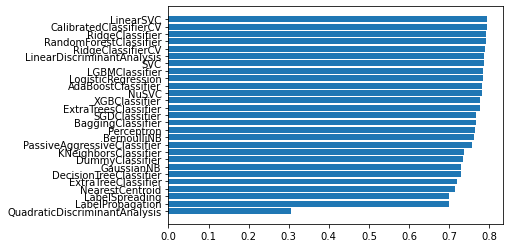

In [92]:
plt.barh(sira.index,sira["Accuracy"])
plt.show()

In [93]:
#model isimlerini tutabilicek bir liste olusturuyorum
models = ["LinearSVC", "SVC" , "Ridge", "Logistic", "RandomForest", "LGBM","XGB"]

In [94]:
#modellerin kendilerini alıyoruz
siniflar = [LinearSVC(random_state=0),SVC(random_state=0),RidgeClassifier(random_state=0),
           LogisticRegression(random_state=0),RandomForestClassifier(random_state=0),
           LGBMClassifier(random_state=0),XGBClassifier(random_state=0)]

In [95]:
#hiper parametreleri gonderiyoruz
parametreler={
    models[0] : {"C":[0.1,1,10,100],"penalty": ["l1","l2"]},
    models[1] : {"kernel": ["linear","rbf"] ,"C":[0.1,1,10], "gamma": [0.01,0.001]},
    models[2] : { "alpha": [0.1,1,10]},
    models[3] : {"C":[0.1,1,10,100],"penalty": ["l1","l2"]},
    models[4] : {"n_estimators": [1000,2000] ,"max_depth":[4,10], "min_samples_split": [2,5]},
    models[5] : {"learning_rate":[0.1,0.01,0.001],"n_estimators": [1000,2000],"max_depth":[4,10],"subsample":[0.4,0.8]},
    models[6] : {"learning_rate":[0.1,0.01,0.001],"n_estimators": [1000,2000],"max_depth":[4,10]}

}

In [96]:
#modelin cozumunu(fit islemini) yapacak bir fonksiyon ve degerlendirmesini yapabilecegimiz bir fonksiyon olusturuyoruz
def cozum(model):
    model.fit(x_train,y_train)
    return model

def skor(model2):
    tahmin=cozum(model2).predict(x_test)
    acs=accuracy_score(y_test,tahmin)
    return acs*100


In [97]:
print(skor(siniflar[0]))

79.53091684434968


In [98]:
#sonuc dogrumu diye deneme yapalim
m=LinearSVC(random_state = 0)
m.fit(x_train,y_train)
t = m.predict(x_test)
s=accuracy_score(y_test,t)
s*100

79.53091684434968

In [99]:
#sonuc: Modellere en uygun hiperparametreleri bulalim
for i,j in zip(models,siniflar):
    print(i)
    grid=GridSearchCV(cozum(j),parametreler[i],cv=10,n_jobs=-1)
    grid.fit(x_train,y_train)
    print(grid.best_params_)

LinearSVC
{'C': 1, 'penalty': 'l2'}
SVC
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Ridge
{'alpha': 0.1}
Logistic
{'C': 1, 'penalty': 'l2'}
RandomForest
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 1000}
LGBM
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number o

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.4}
XGB
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000}


In [100]:
#guncel hiper parametreleri gonderiyoruz
siniflar = [LinearSVC(random_state=0,C= 1, penalty= "l2"),
            SVC(random_state=0,C= 10, gamma= 0.01, kernel= "rbf"),
            RidgeClassifier(random_state=0,alpha= 0.1),
            LogisticRegression(random_state=0,C= 1, penalty= "l2"),
            RandomForestClassifier(random_state=0, max_depth= 10, min_samples_split= 5, n_estimators= 1000),
            LGBMClassifier(random_state=0,learning_rate= 0.01, max_depth= 4, n_estimators= 1000, subsample= 0.4),
            XGBClassifier(random_state=0,learning_rate= 0.01, max_depth= 4, n_estimators= 1000)]

In [101]:
basari =[]

In [102]:
for i in siniflar:
    basari.append(skor(i))
basari

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 886
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[79.53091684434968,
 79.60199004975125,
 79.317697228145,
 78.39374555792466,
 79.60199004975125,
 78.25159914712152,
 78.60696517412936]

In [103]:
a = list(zip(models,basari))
sonuc = pd.DataFrame(a,columns = ["mdoel", "basari"])
print(sonuc.sort_values("basari", ascending=False))

          mdoel  basari
1           SVC   79.60
4  RandomForest   79.60
0     LinearSVC   79.53
2         Ridge   79.32
6           XGB   78.61
3      Logistic   78.39
5          LGBM   78.25
